In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
data = pd.read_csv('RawData-ChurnBank.csv') #inserting the data into python
display(data.shape)
data

(10127, 20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [3]:
#Searching for null values
data.isnull().sum()

#there are two columns that contain null values

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [4]:
#drop duplicates based off ID column
data = data.drop_duplicates(subset = 'CLIENTNUM',keep ='first')
data.shape

#no duplciates

(10127, 20)

In [5]:
#dropping rows with null values
data = data.dropna()


#also dropping rows in Income Category Column where value is unknown
data = data[(data.Income_Category != 'Unknown')] 

display(data.shape)
data.isnull().sum()#printing the new size of the dataframe

#i chose to drop these rows because there were no patterns or 
#indications of what type of info i could put there

(8838, 20)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
#grouping by the income category column
display(data.groupby(by = ['Income_Category'])['Income_Category'].count())

Income_Category
$120K +            712
$40K - $60K       1752
$60K - $80K       1378
$80K - $120K      1501
Less than $40K    3495
Name: Income_Category, dtype: int64

In [7]:
#exporting the clean data file to excel
data.to_excel("clean_data_bankChurn.xlsx")

In [8]:
#cleaning up the Income Category Column and changing it to an integer
data['Income_Category'] = data['Income_Category'].str.replace(r"K",'') #removing the k letter
data['Income_Category'] = data['Income_Category'].str.replace(r"Less than",'') #removing 'Less than'
data['Income_Category'] = data['Income_Category'].str.replace(r"$",'') #removing the $ symbol
data['Income_Category'] = data['Income_Category'].str.replace(r"+",'') #removing the + symbol
data['Income_Category'] = data['Income_Category'].str.strip() #removing any white spaces

#replacing the intial values with int values
data = data.replace(to_replace=['40','40 - 60','60 - 80','80 - 120','120'], value=['30','50','70','100','120'])

#converting from string type to inter
data['Income_Category'] = data['Income_Category'].astype(str).astype(int)

data

/var/folders/xc/z_4h39rs5xl00vgk34134btm0000gn/T/ipykernel_1254/2025382380.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income_Category'] = data['Income_Category'].str.replace(r"$",'') #removing the $ symbol
/var/folders/xc/z_4h39rs5xl00vgk34134btm0000gn/T/ipykernel_1254/2025382380.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income_Category'] = data['Income_Category'].str.replace(r"+",'') #removing the + symbol


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,70,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,30,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,100,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,30,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,70,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,50,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,50,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,30,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,50,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [9]:
#grouping by the income category column
display(data.groupby(by = ['Income_Category'])['Income_Category'].count())

Income_Category
30     3495
50     1752
70     1378
100    1501
120     712
Name: Income_Category, dtype: int64

# Outlier Analysis

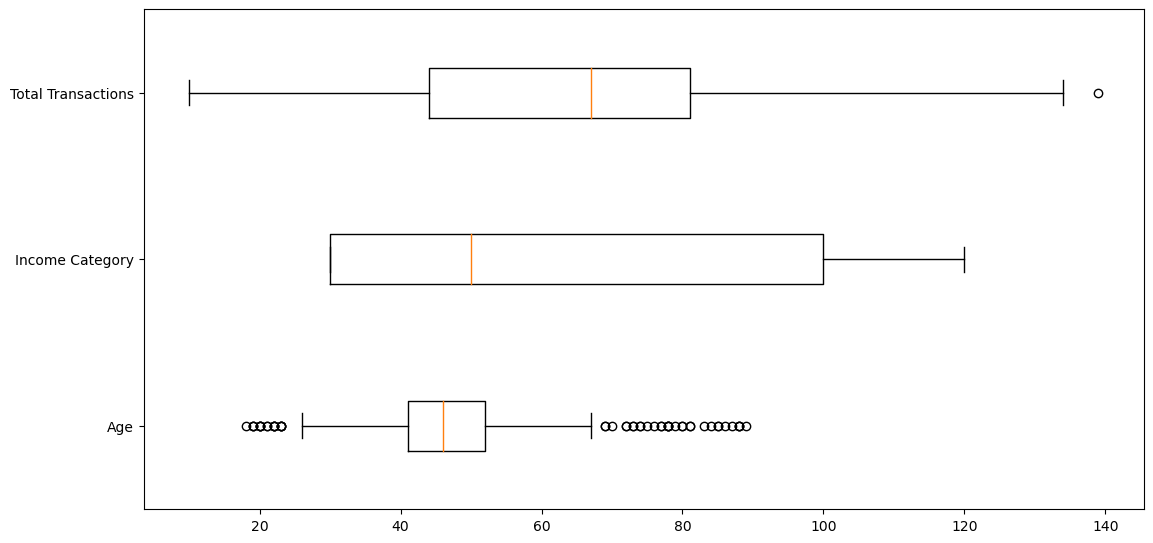

In [10]:
import matplotlib.pyplot as plt

#Creating a box plot that shows outliers

#Separting each company's salary in different list
Age=data['Customer_Age'].tolist()
Income_Category=data['Income_Category'].tolist()
Total_Transactions =data['Total_Trans_Ct'].tolist()

#Setting figure size
fig = plt.figure(figsize =(10, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

#Creating boxplots of 3 groups of salaries
plt.boxplot([Age,Income_Category,Total_Transactions],vert=0)

#Setting y-axis label
ax.set_yticklabels(['Age', 'Income Category','Total Transactions'])

#Showing the final plot
plt.show()